# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we are going through a machine learning project with the goal of predicting the sales price of bulldozers.

## 1. Problem Definition
> How well can we predict the future sale prize of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?
## 2. Data
The data is downloaded from Kaggle Bluebook for Bulldozers competition:https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are three main datasets: 
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which miinimizes RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/1Qn5vDQh-7lqJs69LFRh7IqRZEvgBPovUPCra77z8cow/edit?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
#Import training and validation sets 
df= pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
               low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [22]:
df.saledate.dtype

dtype('O')

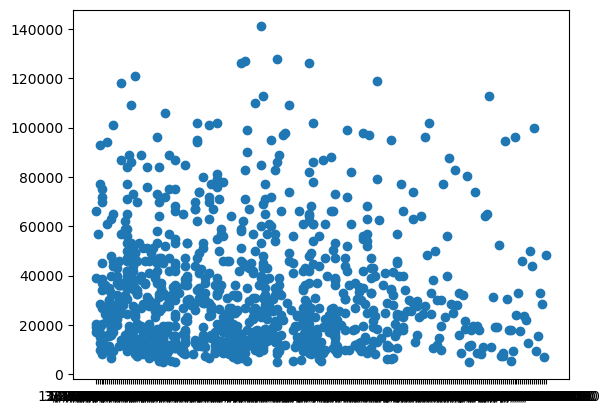

In [9]:
fig, ax= plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
plt.show()

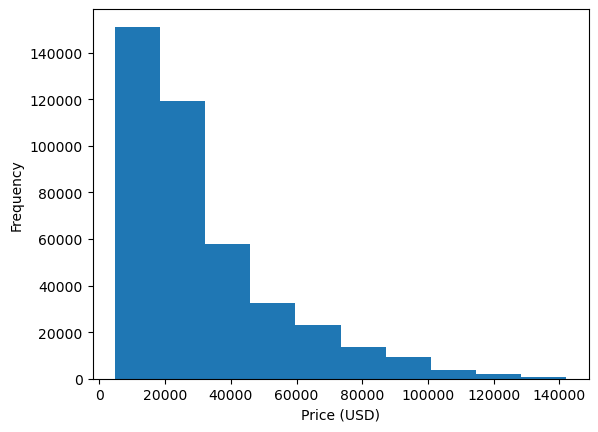

In [20]:
df.SalePrice.plot.hist(bins=10)
plt.xlabel("Price (USD)")
plt.show()

## Parsing Dates

When we work with the time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [23]:
#Import data again but this time parse dates 
df=pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
              low_memory=False,
              parse_dates= ["saledate"])

In [24]:
df.saledate.dtype

dtype('<M8[ns]')

In [25]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

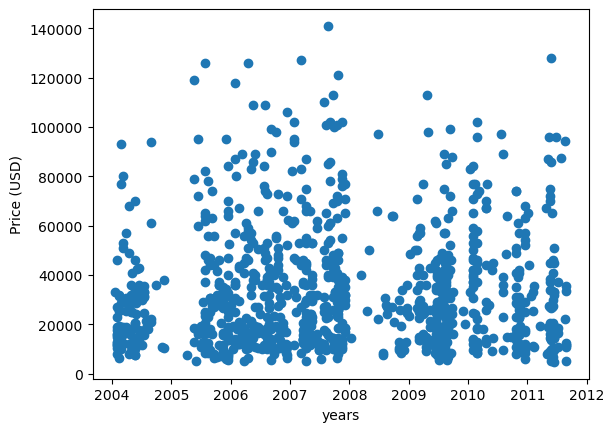

In [28]:
fig, ax= plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
plt.xlabel("years")
plt.ylabel("Price (USD)")
plt.show()

In [29]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [31]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort dataframe by saledate

When working with time series data, it's a good idea to sort it by date 

In [36]:
#Sort DataFrame in date order
df= df.sort_values(by= ["saledate"], ascending=True)
df.saledate.head(20)

205615   1989-01-17
205752   1989-01-31
140257   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we'll still got our original data.

In [115]:
#Make a copy 
df_tmp = df.copy()

### Add datetime parameters for `saledate` column

In [116]:
df_tmp["SaleYear"]= df_tmp.saledate.dt.year
df_tmp["SaleMonth"]=df_tmp.saledate.dt.month
df_tmp["SaleDay"]= df_tmp.saledate.dt.day
df_tmp["SaleDayOfWeek"]=df_tmp.saledate.dt.dayofweek
df_tmp["SaleDayOfYear"]=df_tmp.saledate.dt.dayofyear
df_tmp.head().T

,205615,205752,140257,141296,212552
SalesID,1646770,1646995,1502329,1505138,1671174
SalePrice,9500.0,10500.0,35000.0,50000.0,16000.0
MachineID,1126363,1044876,1300019,1473654,1327630
ModelID,8434,8443,4155,4139,8591
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1973,1977,1978,1980
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [117]:
# #Now we have enriched our data eith the date time features, we can remove the "saledate" column
df_tmp.drop("saledate",
           axis=1,
           inplace=True)


In [118]:
#Check the values of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5.Modelling 
we've done enough EDA (we could always do more) but let's start to do some model-driven EDA

In [119]:
#Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor(n_jobs=-1, #Using all processors
                            random_state=42) #Equivalent to random seed

#Separate the data as X and Y
X=df_tmp.drop("SalePrice", axis=1)
Y=df_tmp["SalePrice"]

model.fit(X, Y)

ValueError: could not convert string to float: 'Low'

### Convert strings to categories

One way to turn all of our data into numbers is by converting them into pandas categories.


In [120]:
df_tmp.head().T

,205615,205752,140257,141296,212552
SalesID,1646770,1646995,1502329,1505138,1671174
SalePrice,9500.0,10500.0,35000.0,50000.0,16000.0
MachineID,1126363,1044876,1300019,1473654,1327630
ModelID,8434,8443,4155,4139,8591
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1973,1977,1978,1980
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,40,D9H,D7G,A62


In [121]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

In [122]:
#Find the columns which contain strings
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [123]:
#This will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label]= content.astype("category").cat.as_ordered()
    

In [124]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [125]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [126]:
df_tmp.state.cat.codes

205615    43
205752     8
140257     8
141296     8
212552     8
          ..
411522     4
408976     4
409783     4
411890     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas Categories, we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data

In [127]:
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data 

In [128]:
#Export current tmp database
df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv",
             index=False)

In [129]:
#Import preprocessed data
df_tmp=pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv",
                  low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1646995,1502329,1505138,1671174
SalePrice,9500.0,10500.0,35000.0,50000.0,16000.0
MachineID,1126363,1044876,1300019,1473654,1327630
ModelID,8434,8443,4155,4139,8591
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1973,1977,1978,1980
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,40,D9H,D7G,A62


In [130]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Filling missing values

### Fill numerical missing values first

In [131]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayOfWeek
SaleDayOfYear


In [132]:
df_tmp.ModelID.dtype

dtype('int64')

In [133]:
#Chec for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
    

auctioneerID
MachineHoursCurrentMeter


In [134]:
# Fill the numeric rows with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"]= pd.isnull(content)
            #Fill the missing numeric data with the median
            df_tmp[label] = content.fillna(content.median())

In [135]:
#Demonstrate how median is more robust than mean
hundreds = np.full((1000), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(np.float64(100.0),
 np.float64(999100.8991008991),
 np.float64(100.0),
 np.float64(100.0))

In [136]:
#Check if ther's any null numeric value
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            

In [137]:
#Check to see how man examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [138]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers

In [139]:
#Chec for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [147]:
#Turn categorical data into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add a binary column to indicate whether sample had missing value 
        df_tmp[label+"_is_missing"]= pd.isnull(content)
        #Turn Categories into numbers and +1
        df_tmp[label] = pd.Categorical(content).codes + 1 #Because code given to a missing value in pandas is -1
        

In [146]:
pd.Categorical(df_tmp["state"]).codes  +1

array([44,  9,  9, ...,  5,  5,  5], shape=(412698,), dtype=int8)

In [145]:
pd.Categorical(df_tmp["UsageBand"]).codes

array([-1, -1, -1, ..., -1, -1, -1], shape=(412698,), dtype=int8)

In [148]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [149]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1646995,1502329,1505138,1671174
SalePrice,9500.0,10500.0,35000.0,50000.0,16000.0
MachineID,1126363,1044876,1300019,1473654,1327630
ModelID,8434,8443,4155,4139,8591
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,False,True
Blade_Type_is_missing,False,True,False,False,True
Travel_Controls_is_missing,False,True,False,False,True
Differential_Type_is_missing,True,True,True,True,False


In [150]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all of our data is numeric as well as our database has no missing values, we should be able to make a machine learning model

In [152]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1646995,10500.0,1044876,8443,132,99.0,1973,0.0,0,701,...,False,False,False,False,False,True,True,True,True,True
2,1502329,35000.0,1300019,4155,132,99.0,1977,0.0,0,2403,...,True,True,True,True,True,False,False,False,True,True
3,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
4,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False


In [153]:
len(df_tmp)

412698

In [155]:
%%time
#Instantiate model 
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

#Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: total: 24min 18s
Wall time: 2min 12s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [156]:
#Score the model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875918577819788

**Question:** why doesn't the above metric hold water? (Why isn't it reliable)

### Splitting data into train and validation sets

In [157]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1646995,10500.0,1044876,8443,132,99.0,1973,0.0,0,701,...,False,False,False,False,False,True,True,True,True,True
2,1502329,35000.0,1300019,4155,132,99.0,1977,0.0,0,2403,...,True,True,True,True,True,False,False,False,True,True
3,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
4,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False


In [158]:
df_tmp.SaleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: SaleYear, Length: 412698, dtype: int64

In [159]:
df_tmp.SaleYear.value_counts()

SaleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [160]:
# Split data into training and validation 
df_val = df_tmp[df_tmp.SaleYear==2012]
df_train = df_tmp[df_tmp.SaleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [161]:
#Split data into X, Y
X_train, Y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, Y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [162]:
#Create evaluation function (the competitiion uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(Y_test, Y_preds):
    """
    Calculates root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(Y_test, Y_preds))

#Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds= model.predict(X_train)
    val_preds=model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(Y_train, train_preds),
             "Validation MAE": mean_absolute_error(Y_valid, val_preds),
             "Training RMSLE": rmsle(Y_train, train_preds),
             "Validation RMSLE": rmsle(Y_valid, val_preds),
             "Training R^2": r2_score(Y_train, train_preds),
             "Validation R^2": r2_score(Y_valid, val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [ ]:
# #This takes far too long
# %%time
# model= RandomForestRegressor(n_jobs=-1,
#                             random_state=42)
# model.fit(X_train, Y_train)

In [163]:
len(X_train)

401125

In [165]:
#Change max samples value
model= RandomForestRegressor(n_jobs=-1,
                            random_state=42,
                            max_samples=10000) #Cutting down samples to work on to save time


In [166]:
%%time
#Cutting down on the max numbers of samples each estimator can see improves training time
model.fit(X_train,Y_train )

CPU times: total: 45.7 s
Wall time: 4.22 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [167]:
show_scores(model)

{'Training MAE': 5564.6502036023685,
 'Validation MAE': 7178.431420547827,
 'Training RMSLE': np.float64(0.2579465145400615),
 'Validation RMSLE': np.float64(0.2942031348561946),
 'Training R^2': 0.860238498499662,
 'Validation R^2': 0.8323312362315772}

# Full model 

In [179]:
%%time
full_model= RandomForestRegressor(n_jobs=-1,
                            random_state=42)
full_model.fit(X_train, Y_train)


CPU times: total: 23min 14s
Wall time: 1min 46s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [180]:
show_scores(full_model)

{'Training MAE': 1579.4707936678087,
 'Validation MAE': 6125.652943057116,
 'Training RMSLE': np.float64(0.08418289302911171),
 'Validation RMSLE': np.float64(0.25539494922662914),
 'Training R^2': 0.9875261479264724,
 'Validation R^2': 0.871817091048104}

### Hyperparameter tuning with Randomized Search CV


In [182]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid={"n_estimators": np.arange(10,100,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,10,2),
         "min_samples_leaf": np.arange(1,20,2),
         "max_features": [0.5,1,"sqrt", "log2"],
         "max_samples":[10000] }
#Instantiate RandomizedSearchCV 
rs_model= RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                  random_state=42),
                            param_distributions= rf_grid,
                            n_iter=2,
                            cv=5,
                            verbose=True)
#Train the model
rs_model.fit(X_train, Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 13.2 s
Wall time: 7.08 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [183]:
#Find the best hyperparameters of the model
rs_model.best_params_

{'n_estimators': np.int64(10),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(13),
 'max_samples': 10000,
 'max_features': 'log2',
 'max_depth': None}

In [184]:
#Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 9515.244686369691,
 'Validation MAE': 11600.900585471265,
 'Training RMSLE': np.float64(0.41816833706758816),
 'Validation RMSLE': np.float64(0.4551581433247453),
 'Training R^2': 0.6443074262232137,
 'Validation R^2': 0.6158089802131013}

### Train a model with the best hyperparameters
**Note**: These were found after 100 iterations of `RandomizedSearchCV`

In [186]:
%%time
#Most ideal hyperparameters
ideal_model= RandomForestRegressor(n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  max_samples=None,
                                  random_state=42)
#Fit the ideal model 
ideal_model.fit(X_train, Y_train)

CPU times: total: 4min 6s
Wall time: 21.5 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [188]:
#Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2956.4156200428647,
 'Validation MAE': 5935.578485021811,
 'Training RMSLE': np.float64(0.14465604425813416),
 'Validation RMSLE': np.float64(0.24528409396148346),
 'Training R^2': 0.9589058538970266,
 'Validation R^2': 0.8822690720918507}

### Make predictions on Test data

In [220]:
#import the test data
df_test= pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                    low_memory=False,
                    parse_dates= ["saledate"])
df_test.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [221]:
def preprocess_data(df):
    """
    Performs transformation on df and returns transformed df.
    """
    df["SaleYear"] = df.saledate.dt.year
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleDay"] = df.saledate.dt.day
    df["SaleDayOfWeek"] = df.saledate.dt.dayofweek
    df["SaleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)
    
    #Fill the numeric row with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"]= pd.isnull(content)
                df[label]= content.fillna(content.median())
    #Fill categorical missing data and turn categories into numeric
        if not pd.api.types.is_numeric_dtype(content):
            df[label+ "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
    return df

In [222]:
#Process the test data
df_test= preprocess_data(df_test)
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=101)

In [223]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [224]:
#Make predictions on updated test data
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [225]:
#We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [226]:
#Manually adjust df_test to have auctioneeerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally now our test dataframe has the same features as our training dataframe, we can make predictions! 

In [229]:
#Make predictions on the test data
df_test= df_test[X_train.columns] #In the same order as in the training set 
test_preds = ideal_model.predict(df_test)

In [230]:
test_preds

array([16982.85317627, 16012.06262993, 46347.21933279, ...,
       13743.42377537, 16104.82194691, 27335.99576845], shape=(12457,))

In [232]:
#Format predictions into the same format kaggle is after
df_preds= pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,16982.853176
1,1227844,16012.062630
2,1227847,46347.219333
3,1227848,70210.593455
4,1227863,57101.670024
...,...,...
12452,6643171,36612.334376
12453,6643173,11360.465237
12454,6643184,13743.423775
12455,6643186,16104.821947


In [233]:
#Export prediction data
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)


### Feature importance 

Feature importance seeks to figure out which different attributes of the data were importance when it comes to predicting the **target variable** (SalePrice).

In [237]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.55240420e-02, 2.09034515e-02, 4.49292772e-02, 1.83974533e-03,
       3.40399953e-03, 2.04542119e-01, 3.47405336e-03, 1.00259094e-03,
       3.84675811e-02, 4.56044670e-02, 5.87582644e-02, 4.86725328e-03,
       1.38752883e-02, 1.61399308e-01, 4.40804435e-02, 5.96244224e-03,
       2.18008416e-03, 3.30896804e-03, 4.24146800e-03, 5.98821982e-02,
       8.36244542e-04, 5.67624091e-05, 9.50286280e-04, 1.89814056e-04,
       1.55612836e-03, 3.02283627e-04, 4.49772773e-03, 1.24785068e-02,
       8.06780016e-04, 3.92425192e-04, 4.25545344e-03, 1.23856891e-03,
       3.11282524e-03, 1.07755222e-03, 4.04106036e-03, 4.32755073e-03,
       8.61187207e-04, 1.75637207e-02, 3.82774022e-03, 2.82715336e-03,
       9.88806072e-04, 8.44738495e-04, 2.93869978e-03, 5.74381404e-04,
       4.21888432e-04, 3.50636618e-04, 2.19049835e-04, 2.27322491e-03,
       7.79406575e-04, 2.98648067e-04, 3.95234553e-04, 7.19902648e-02,
       3.83196254e-03, 5.62198911e-03, 2.83262089e-03, 9.75958850e-03,
      

In [249]:
#Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df=(pd.DataFrame({"features":columns,
                     "feature_importances": importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True))
    #Plot the dataframe 
    fig, ax= plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

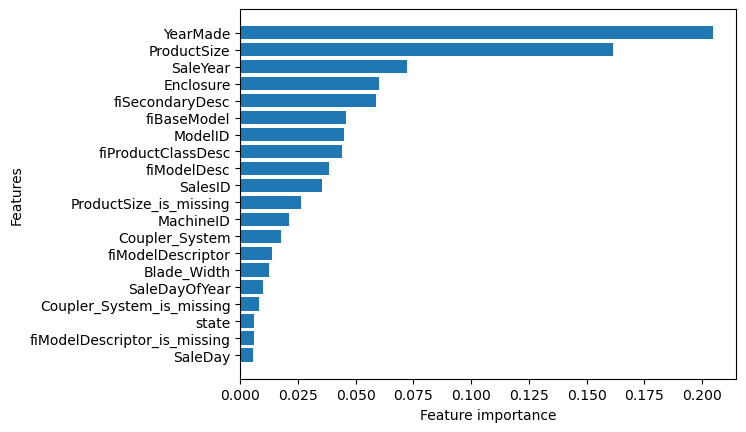

In [250]:
plot_features(X_train.columns, ideal_model.feature_importances_)
plt.show()